In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

In [161]:
plt.rcParams["figure.figsize"] = (19,14)
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14
})

# Create 2x2 sub plots
gs = gridspec.GridSpec(3, 3)


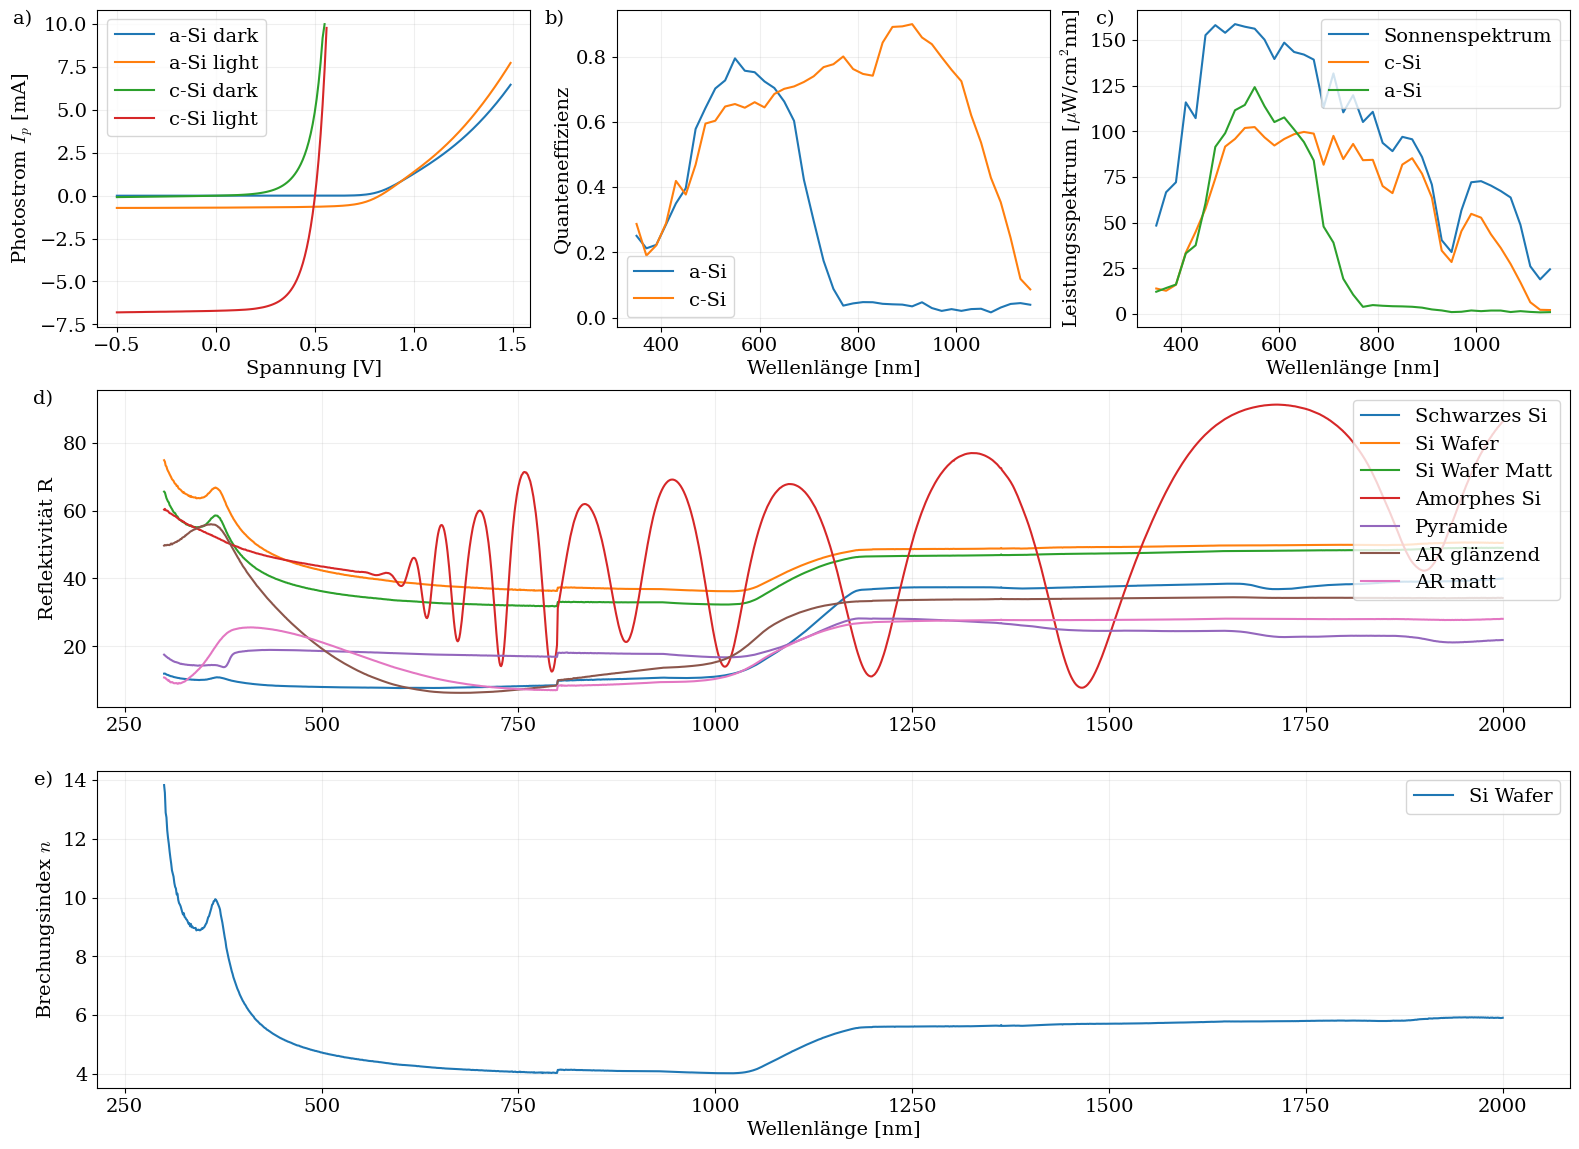

In [175]:
fig = plt.figure()
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1

ax2_ = fig.add_subplot(gs[0, 2]) # row 0, col 1

ax3 = fig.add_subplot(gs[1, :]) # row 1, span all columns
ax4 = fig.add_subplot(gs[2, :]) # row 1, span all columns

ax1.text(-0.15, 1, "a)", transform=ax1.transAxes,fontsize=14, va='top', ha='right')
ax2.text(-0.12, 1, "b)", transform=ax2.transAxes,fontsize=14, va='top', ha='right')
ax2_.text(-0.05, 1, "c)", transform=ax2_.transAxes,fontsize=14, va='top', ha='right')
ax3.text(-0.03, 1, "d)", transform=ax3.transAxes,fontsize=14, va='top', ha='right')
ax4.text(-0.03, 1, "e)", transform=ax4.transAxes,fontsize=14, va='top', ha='right')

volt_si_dark_a, response_si_dark_a = np.loadtxt("data/UI_a-Si_dark.txt", unpack=True, skiprows=4)
volt_si_light_a, response_si_light_a = np.loadtxt("data/UI_a-Si_light.txt", unpack=True, skiprows=4)
volt_si_dark_c, response_si_dark_c = np.loadtxt("data/UI_c-Si_dark.txt", unpack=True, skiprows=4)
volt_si_light_c, response_si_light_c = np.loadtxt("data/UI_c-Si_light.txt", unpack=True, skiprows=4)

ax1.plot(volt_si_dark_a, response_si_dark_a * 1000, label="a-Si dark")
ax1.plot(volt_si_light_a, response_si_light_a * 1000, label="a-Si light")
ax1.plot(volt_si_dark_c[:106], response_si_dark_c[:106] * 1000, label="c-Si dark")
ax1.plot(volt_si_light_c[:107], response_si_light_c[:107] * 1000, label="c-Si light")


ax1.set_xlabel("Spannung [V]")
ax1.set_ylabel("Photostrom $I_p$ [mA]")
ax1.grid(alpha=0.2)
ax1.legend()


Wavelength_si_a, MeanValue_si_a, stdValue_si_a = np.loadtxt("data/QE_aSi.txt", unpack=True, skiprows=3, usecols=(0,1,2), delimiter=" , ")
Wavelength_si_c, MeanValue_si_c, stdValue_si_c = np.loadtxt("data/QE_cSi.txt", unpack=True, skiprows=3, usecols=(0,1,2), delimiter=" , ")
Wavelength_qe, MeanValue_qe, stdValue_qe = np.loadtxt("data/QE_photons.txt", unpack=True, skiprows=3, usecols=(0,1,2), delimiter=" , ")
wl, psd = np.loadtxt("data/AM1SolarSpectrum.txt", unpack=True, skiprows=1)

ax2.plot(Wavelength_si_a, MeanValue_si_a / MeanValue_qe * 1.23, label="a-Si")
ax2.plot(Wavelength_si_c, MeanValue_si_c / MeanValue_qe * 1.23, label="c-Si")

ax2.set_xlabel("Wellenlänge [nm]")
ax2.set_ylabel("Quanteneffizienz")
ax2.grid(alpha=0.2)
ax2.legend()

ax2_.plot(wl, psd * 1000, label="Sonnenspektrum")
ax2_.plot(Wavelength_si_c, MeanValue_si_c / MeanValue_qe * 1.23 * psd * 1000, label="c-Si")
ax2_.plot(Wavelength_si_c, MeanValue_si_a / MeanValue_qe * 1.23 * psd * 1000, label="a-Si")

ax2_.set_xlabel("Wellenlänge [nm]")
ax2_.set_ylabel("Leistungsspektrum [$\mu$W/cm$^{2}$nm]")
ax2_.grid(alpha=0.2)
ax2_.legend()

df = pd.read_csv("data/Reflexionsmessung.csv")

wavelength = df['Wavelength (nm)'].values
Schwarzes_Silizium = df['Schwarzes_Silizium'].values
Si_Waver = df['Si_Waver'].values
Si_Waver_Matt = df['Si_Waver_Matt'].values
Si_amorph = df['Si_amorph'].values
Pyramide = df['Pyramide'].values
AR_Glanzend = df['AR_Glanzend'].values
AR_Matt = df['AR_Matt'].values
 
ax3.plot(wavelength, Schwarzes_Silizium, label="Schwarzes Si")
ax3.plot(wavelength, Si_Waver, label="Si Wafer")
ax3.plot(wavelength, Si_Waver_Matt, label="Si Wafer Matt")
ax3.plot(wavelength, Si_amorph, label="Amorphes Si")
ax3.plot(wavelength, Pyramide, label="Pyramide")
ax3.plot(wavelength, AR_Glanzend, label="AR glänzend")
ax3.plot(wavelength, AR_Matt, label="AR matt")

ax3.grid(alpha=0.2)
ax3.set_ylabel("Reflektivität R")
ax3.legend(loc=1)


ax4.plot(wavelength, (1+np.sqrt(Si_Waver/100)) / (1-np.sqrt(Si_Waver/100)), label="Si Wafer")

ax4.set_xlabel("Wellenlänge [nm]")
ax4.set_ylabel("Brechungsindex $n$")
ax4.grid(alpha=0.2)
ax4.legend()

plt.savefig('Multiplot.pdf', bbox_inches='tight')  

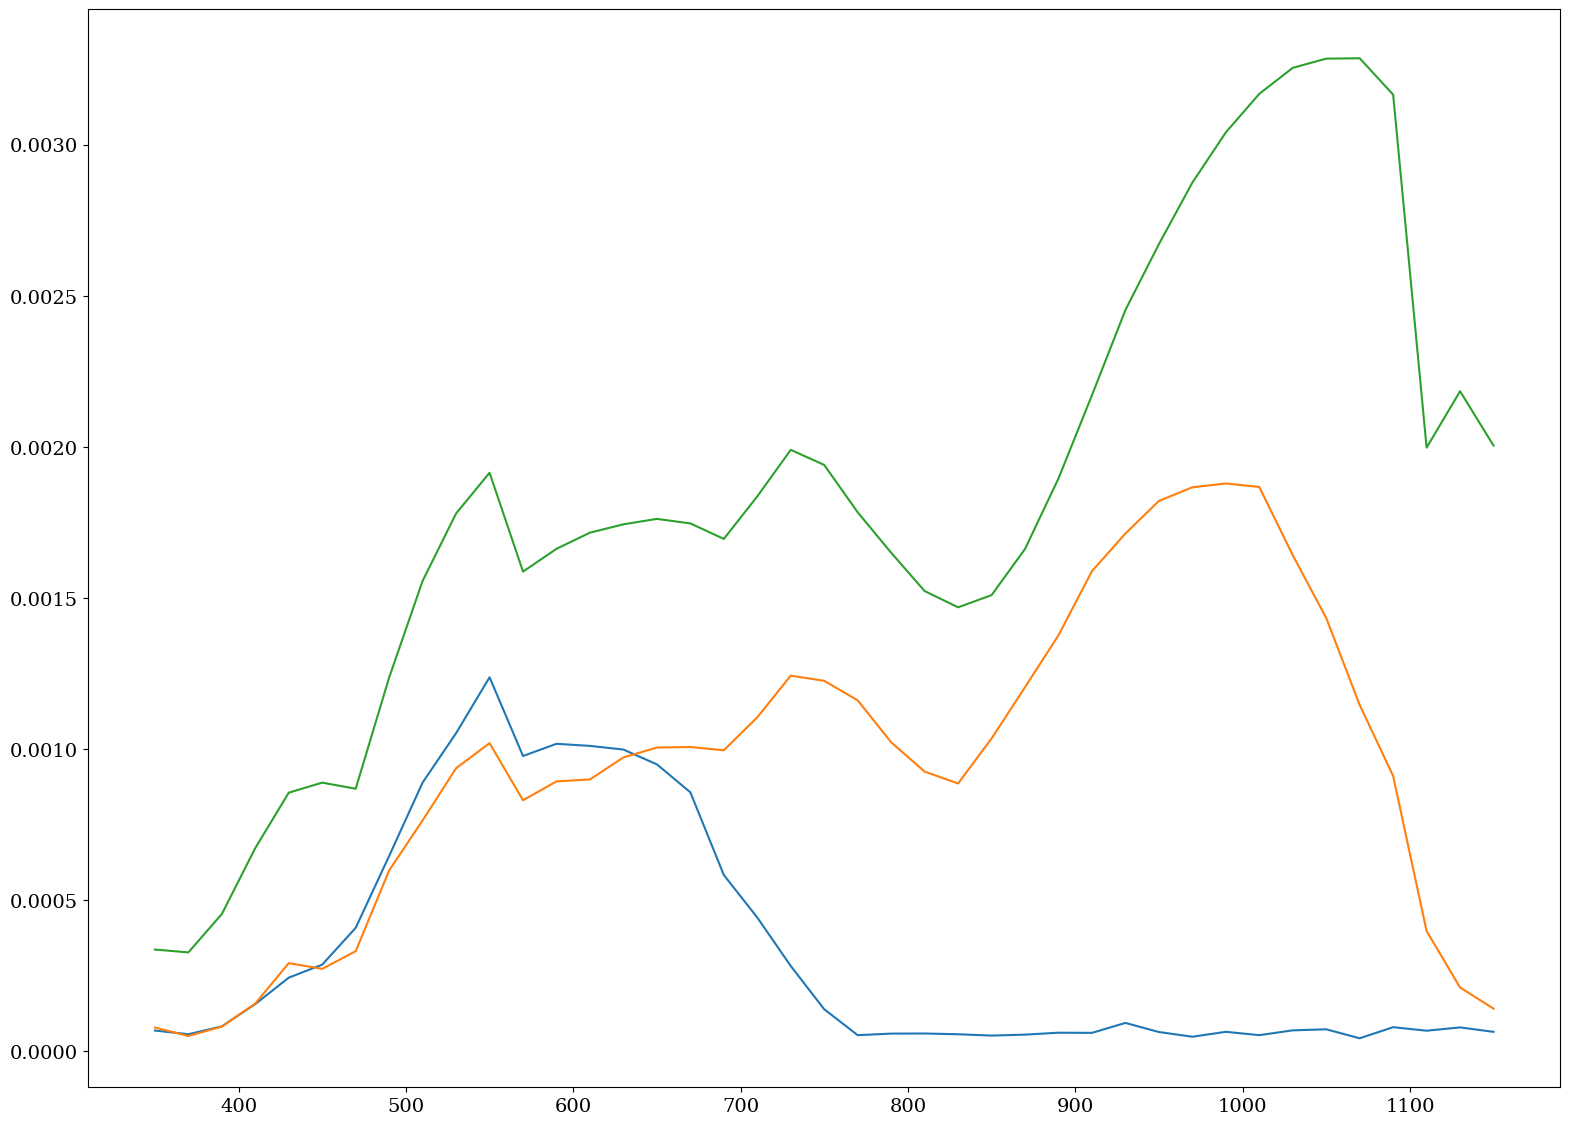

In [163]:
geo = 900
plt.plot(Wavelength_si_a, MeanValue_si_a)
plt.plot(Wavelength_si_c, MeanValue_si_c)
plt.plot(Wavelength_qe, MeanValue_qe)

(0.0, 1.0)

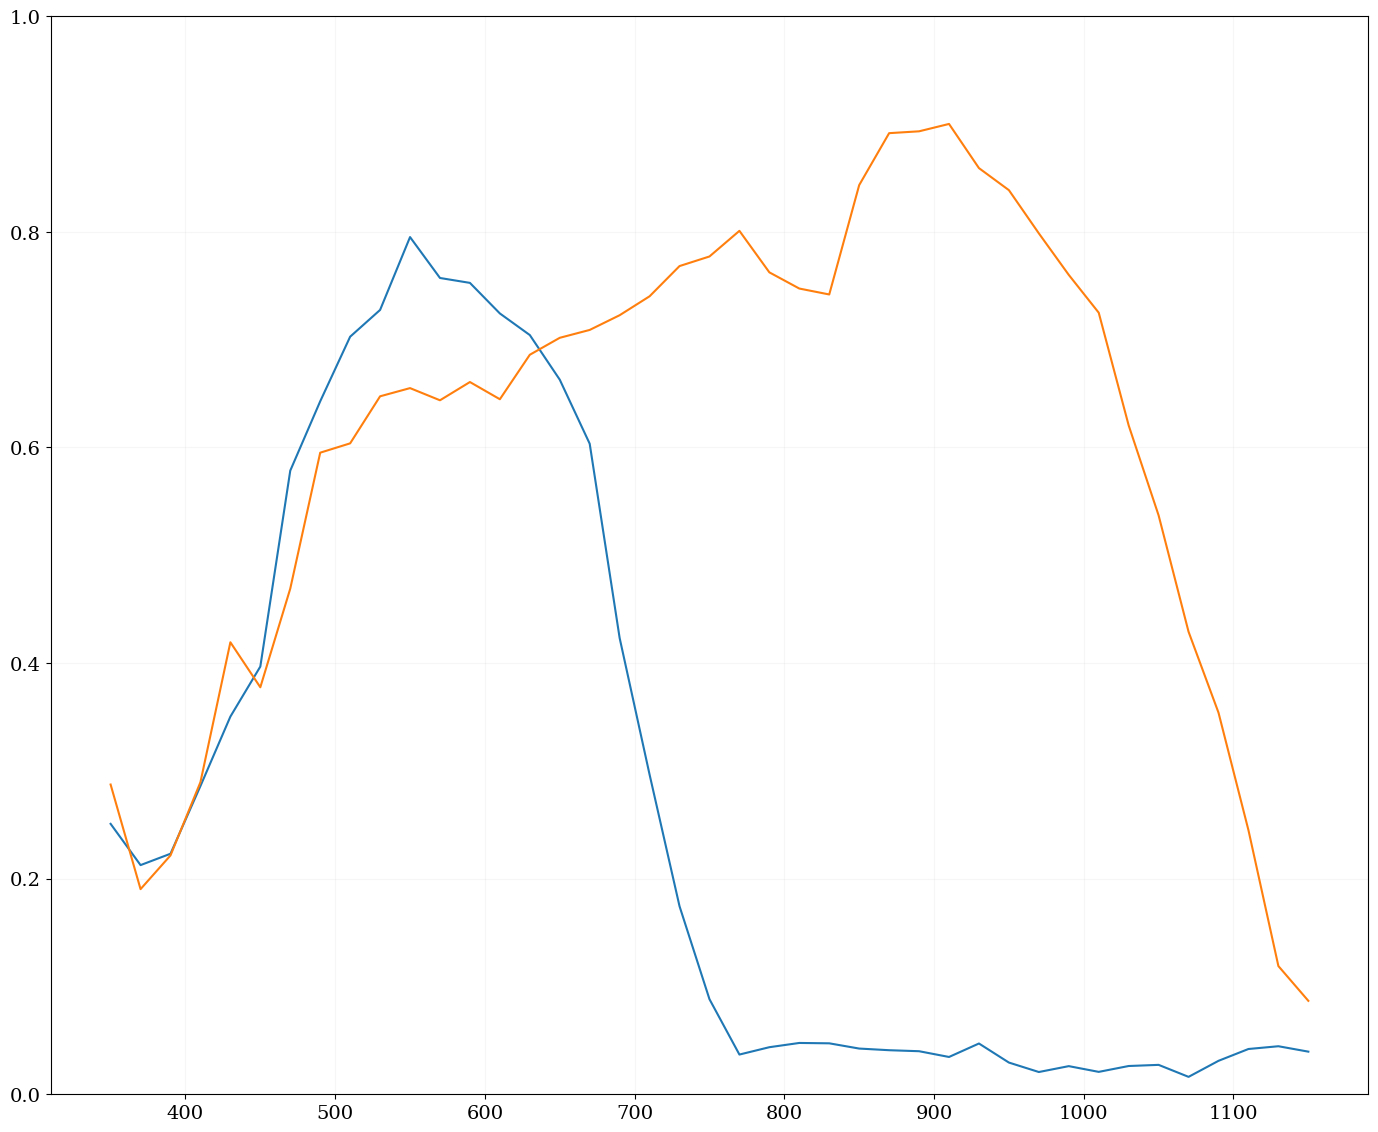

In [142]:
plt.plot(Wavelength_qe, MeanValue_si_a/ MeanValue_qe * 1.23)
plt.plot(Wavelength_qe, MeanValue_si_c/ MeanValue_qe * 1.23)
plt.grid(alpha=0.1)
plt.ylim(0,1)

for i in range(len(MeanValue_qe)):
    Wavelength_qe